# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [21]:
# Basic libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# If you choose to use XGBoost
from xgboost import XGBClassifier


# Set visual styles (optional)
sns.set(style="whitegrid")

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [45]:
# Load the dataset'
data_path = '/workspaces/codespaces-jupyter/data/creditchurn/BankChurners.csv'
df = pd.read_csv(data_path)


# Display the first few rows to confirm
print(df.head())
print(df['Attrition_Flag'].unique())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

## Data Overview

- Observations
- Sanity checks

In [3]:
# Dataset Structure
print(f"Dataset Shape: {df.shape}\n")

# Data Types
print("Data Types:\n")
print(df.dtypes)

# Top 5
print("Top 5: \n")
print(df.head())

# Last 5
print("Last 5: \n")
print(df.tail())

# Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Unique Values for Categorical Variables
print("\nUnique Values in Categorical Variables:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Basic Statistical Overview
print("\nBasic Statistical Overview:")
print(df.describe())



Dataset Shape: (10127, 21)

Data Types:

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object
Top 5: 

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer   

### Observations:

1. **Dataset Size and Structure**: The dataset consists of 10,127 observations (rows) and 21 features (columns), including the target variable `Attrition_Flag`. This provides a substantial amount of data for building a predictive model.

2. **Data Types**: The dataset contains a mix of numerical and categorical variables. Numerical variables include age, dependent count, months on book, etc., while categorical variables include attrition flag, gender, education level, marital status, income category, and card category.

3. **Missing Values**: There are missing values in `Education_Level` (1519 missing) and `Marital_Status` (749 missing). These will need to be addressed during the data preprocessing stage, either through imputation or by removing records with missing values, depending on the analysis and the impact on the model.

4. **Unique Values in Categorical Variables**: The target variable, `Attrition_Flag`, has 2 unique values, indicating a binary classification problem. Other categorical variables have a moderate number of unique values, making them suitable for encoding techniques such as one-hot encoding.

5. **Statistical Overview**:
   - The `Customer_Age` ranges from 26 to 73 years, with a mean age of approximately 46 years. This suggests a diverse age group in the dataset.
   - `Dependent_count` ranges from 0 to 5, indicating varying family sizes.
   - `Months_on_book` (period of relationship with the bank) ranges from 13 to 56 months, with a mean of approximately 36 months, suggesting a broad range of customer loyalty.
   - `Credit_Limit` shows a wide range from 1438.3 to 34516, indicating varied creditworthiness among the customers.
   - `Total_Trans_Amt` and `Total_Trans_Ct` indicate a wide range of transaction behaviors among the customers.


### Sanity Checks

In [4]:
# 1. Check for Duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# 2. Inspect Missing Values Further
# Already identified the columns with missing values. Here, we consider the proportion of missing values.
missing_education = df['Education_Level'].isnull().sum() / len(df) * 100
missing_marital = df['Marital_Status'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in Education_Level: {missing_education:.2f}%")
print(f"Percentage of missing values in Marital_Status: {missing_marital:.2f}%")

# 3. Check Class Distribution for the Target Variable
class_distribution = df['Attrition_Flag'].value_counts(normalize=True) * 100
print("\nClass distribution in Attrition_Flag:")
print(class_distribution)

# 4. Assess Potential Outliers
# Using the Interquartile Range (IQR) method for key numerical columns as an example
for column in ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nNumber of potential outliers in {column}: {outliers.shape[0]}")

# 5. Validate Data Integrity
# Example check for Customer_Age
print(f"\nCustomer Age range: {df['Customer_Age'].min()} to {df['Customer_Age'].max()}")


Number of duplicate rows: 0
Percentage of missing values in Education_Level: 15.00%
Percentage of missing values in Marital_Status: 7.40%

Class distribution in Attrition_Flag:
Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Number of potential outliers in Customer_Age: 2

Number of potential outliers in Credit_Limit: 984

Number of potential outliers in Total_Trans_Amt: 896

Customer Age range: 26 to 73


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [5]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

1. How is the total transaction amount distributed?

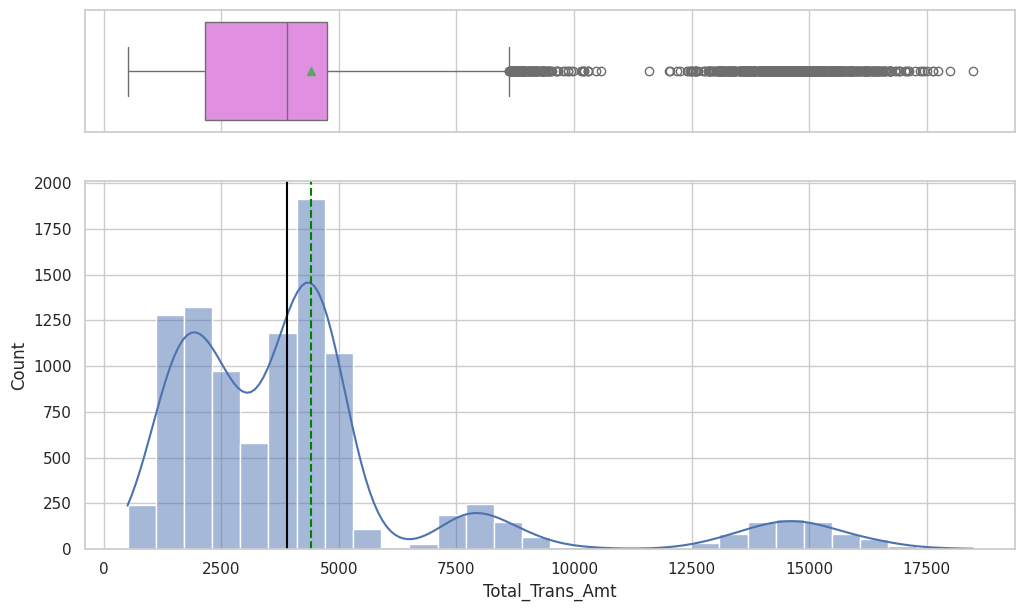

In [6]:
histogram_boxplot(data=df, feature='Total_Trans_Amt', kde=True, bins=30)


In [7]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    

2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?

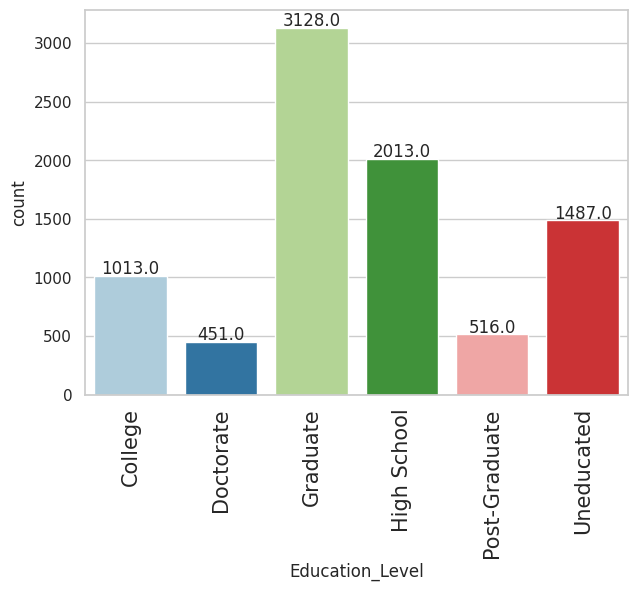

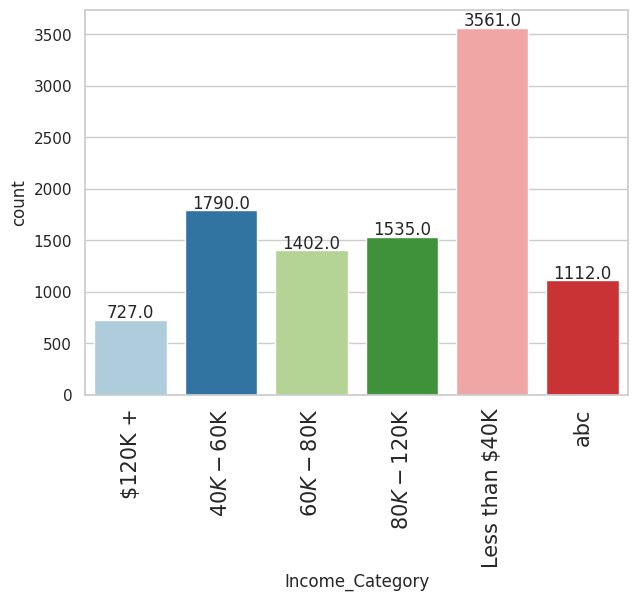

In [8]:
# 2
labeled_barplot(data=df, feature='Education_Level')
# 3
labeled_barplot(data=df, feature='Income_Category')



In [9]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

1. How is the distribution of customer card categories (Card_Category) varied by the customer's income category (Income_Category)?
2. What is the distribution of customers' education levels (Education_Level) across different marital statuses (Marital_Status)?
3. How does the account status (Attrition_Flag) vary by customers' age groups?

Card_Category    Blue  Gold  Platinum  Silver    All
Income_Category                                     
All              9436   116        20     555  10127
abc              1045     9         5      53   1112
$120K +           645    18         4      60    727
$60K - $80K      1273    29         4      96   1402
Less than $40K   3403    24         4     130   3561
$80K - $120K     1395    21         2     117   1535
$40K - $60K      1675    15         1      99   1790
------------------------------------------------------------------------------------------------------------------------


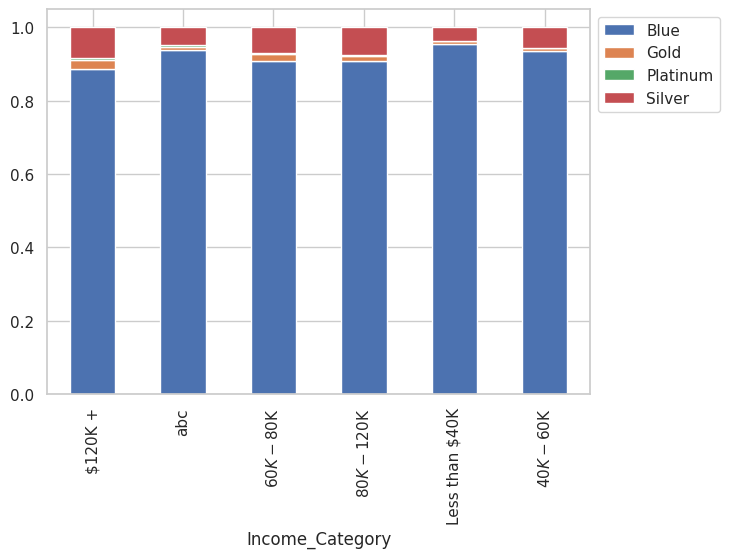

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Marital_Status                                                              
All                  939        423      2901         1859            473   
Married              467        205      1479          949            243   
Single               386        182      1197          782            189   
Divorced              86         36       225          128             41   

Education_Level  Uneducated   All  
Marital_Status                     
All                    1378  7973  
Married                 656  3999  
Single                  586  3322  
Divorced                136   652  
------------------------------------------------------------------------------------------------------------------------


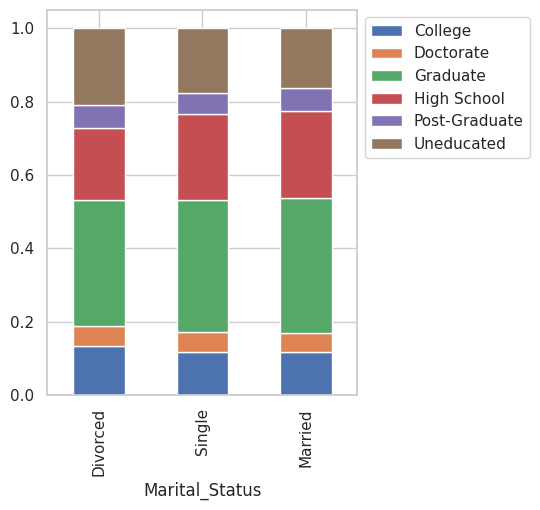

Attrition_Flag  Attrited Customer  Existing Customer    All
Age_Group                                                  
All                          1627               8500  10127
40s                           772               3789   4561
50s                           506               2492   2998
30s                           261               1580   1841
60s                            71                459    530
20s                            17                178    195
70+                             0                  2      2
------------------------------------------------------------------------------------------------------------------------


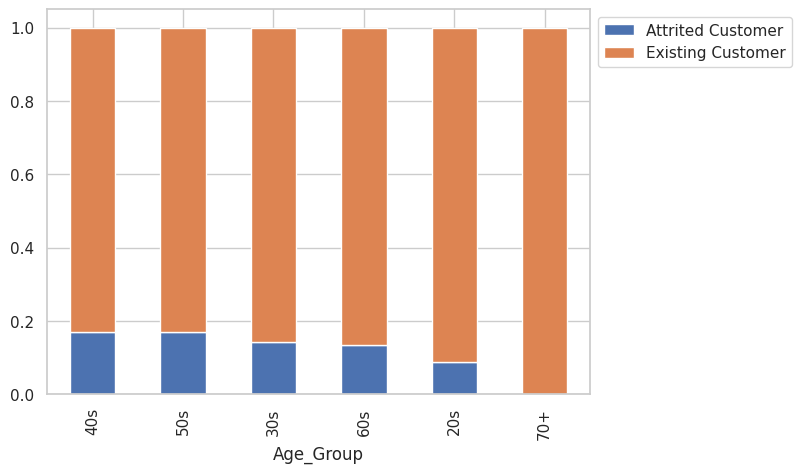

In [10]:

# Question 1: Distribution of Card Categories by Income Category
stacked_barplot(data=df, predictor='Income_Category', target='Card_Category')

# Question 2: Distribution of Education Levels across Marital Statuses
stacked_barplot(data=df, predictor='Marital_Status', target='Education_Level')

# Categorizing Customer_Age (for question 3)
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[20, 29, 39, 49, 59, 69, 79], labels=['20s', '30s', '40s', '50s', '60s', '70+'])

# Question 3: Account Status Variation by Customers' Age Groups
stacked_barplot(data=df, predictor='Age_Group', target='Attrition_Flag')


In [11]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

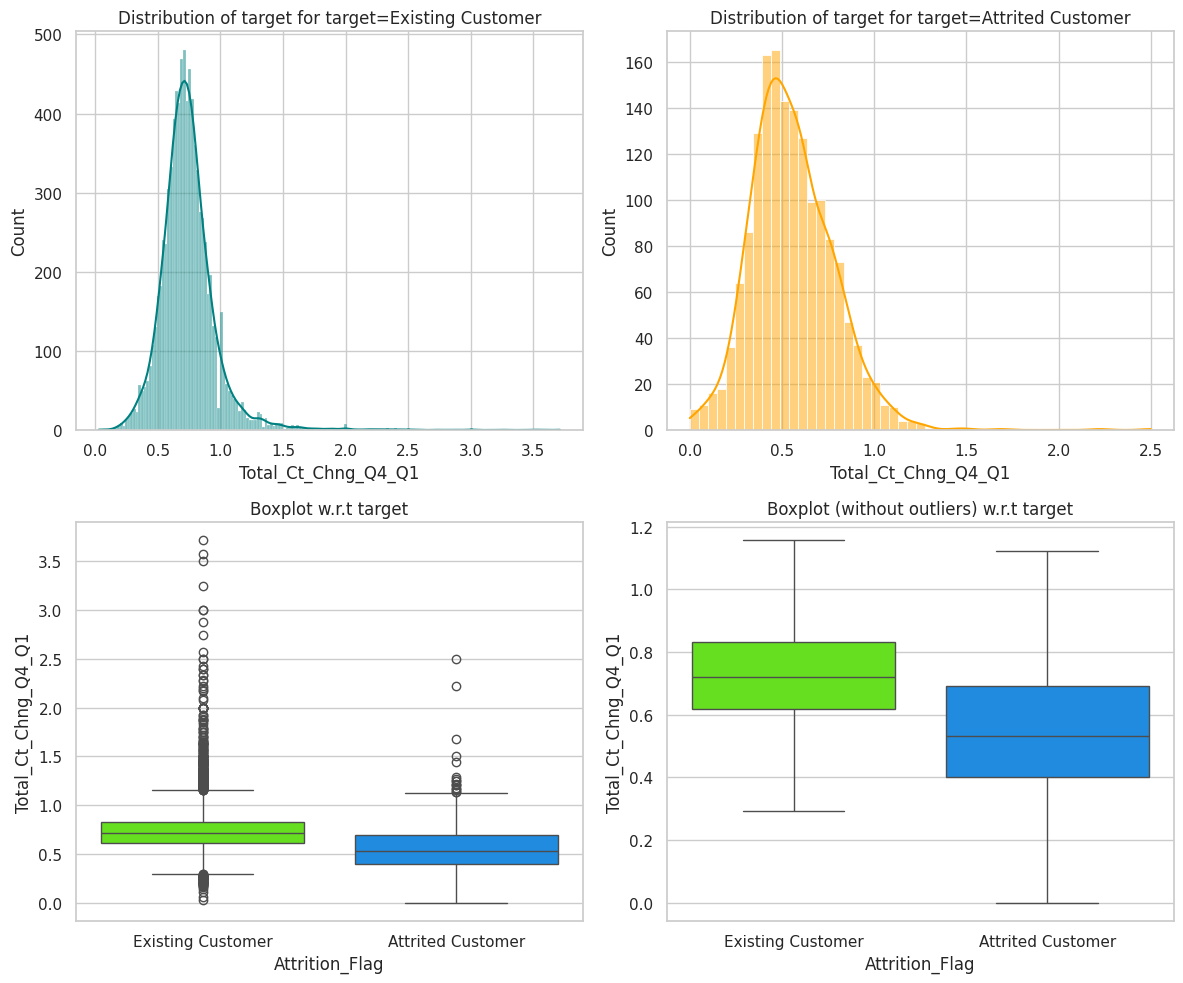

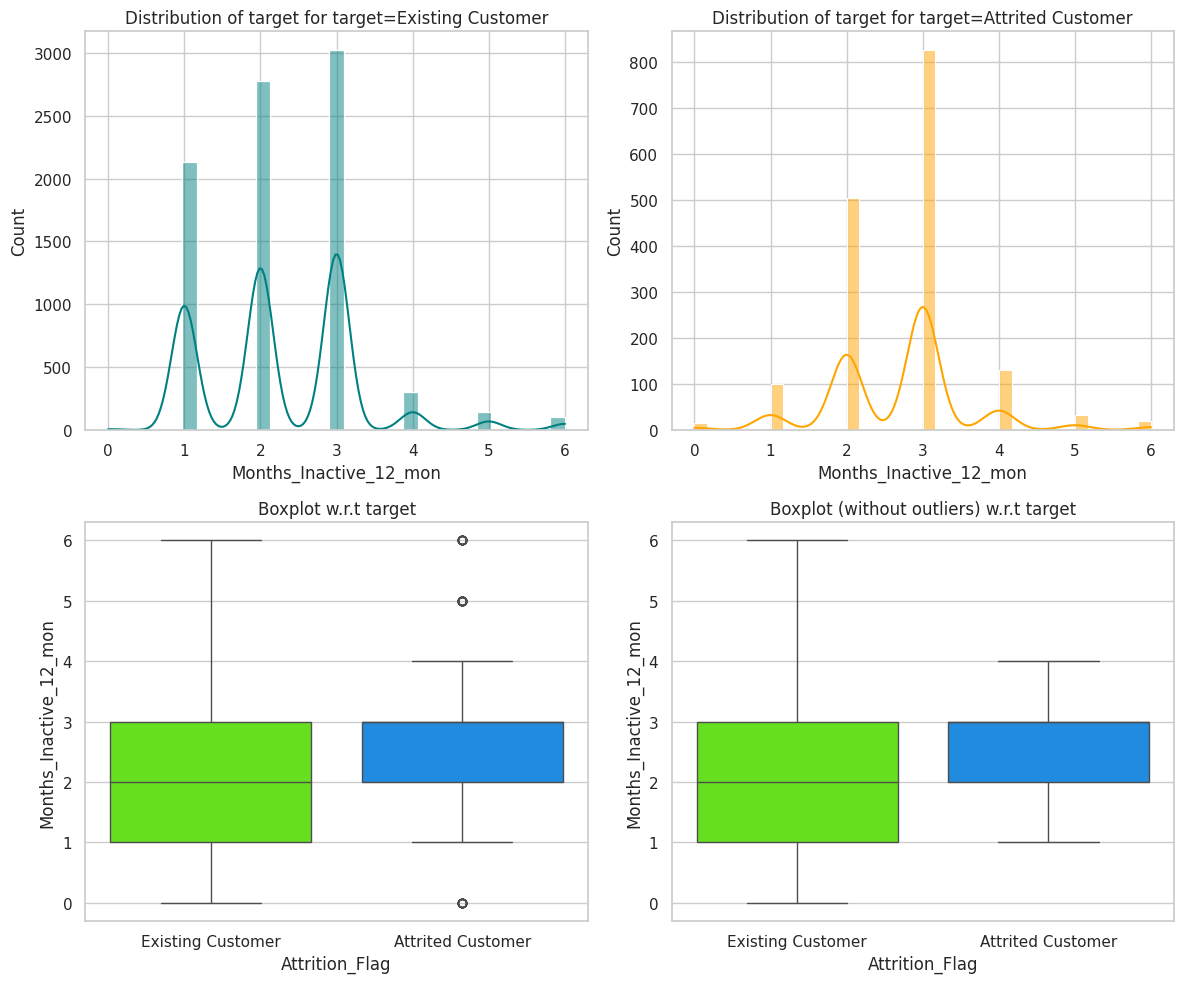

In [12]:
# 4
distribution_plot_wrt_target(data=df, predictor='Total_Ct_Chng_Q4_Q1', target='Attrition_Flag')
# 5
distribution_plot_wrt_target(data=df, predictor='Months_Inactive_12_mon', target='Attrition_Flag')



6. What are the attributes that have a strong correlation with each other?

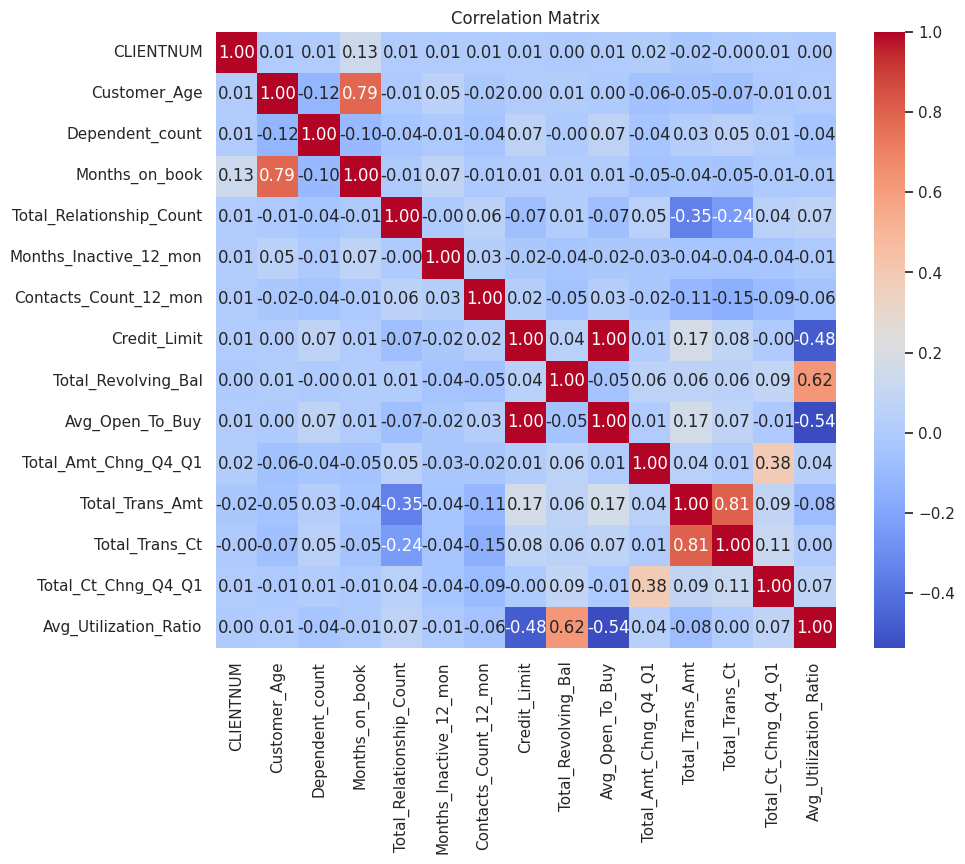

In [13]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


## Data Pre-processing

## Missing value imputation




In [46]:
# Impute missing values for 'Education_Level' and 'Marital_Status'
imputer = SimpleImputer(strategy='most_frequent')
df[['Education_Level', 'Marital_Status']] = imputer.fit_transform(df[['Education_Level', 'Marital_Status']])

# Correctly encode 'Attrition_Flag' into binary format
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Verify the encoding process
print(df['Attrition_Flag'].value_counts())



# Specify categorical and numerical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Attrition_Flag']).tolist()

# Preprocessing for numerical features: scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the dataset into features and target variable
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



0    8500
1    1627
Name: Attrition_Flag, dtype: int64


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [15]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = []  # Empty list to store all the models

# Appending models to the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1, max_iter=1000)))  # Increased max_iter for convergence

print(y_train.value_counts())
print(df['Attrition_Flag'].value_counts())




0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    8500
1    1627
Name: Attrition_Flag, dtype: int64


In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# Create an empty DataFrame to store all model's performance
models_performance = pd.DataFrame()

for name, model in models:
    # Define the machine learning pipeline
    ml_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', model)])
    
    # Fit the pipeline to the training data
    ml_pipeline.fit(X_train, y_train)
    
    # Evaluate model performance on the training set
    train_perf = model_performance_classification_sklearn(ml_pipeline, X_train, y_train)
    train_perf.index = [f"{name} - Train"]
    
    # Evaluate model performance on the test set
    test_perf = model_performance_classification_sklearn(ml_pipeline, X_test, y_test)
    test_perf.index = [f"{name} - Test"]
    
    # Concatenate performance data
    models_performance = pd.concat([models_performance, train_perf, test_perf])

# Display the models' performance
print(models_performance)


                             Accuracy    Recall  Precision        F1
Bagging - Train              0.995433  0.976190   0.995301  0.985653
Bagging - Test               0.952122  0.790769   0.898601  0.841244
Random Forest - Train        1.000000  1.000000   1.000000  1.000000
Random Forest - Test         0.956565  0.778462   0.940520  0.851852
Decision Tree - Train        1.000000  1.000000   1.000000  1.000000
Decision Tree - Test         0.936328  0.769231   0.822368  0.794913
Gradient Boosting - Train    0.976176  0.894009   0.954881  0.923443
Gradient Boosting - Test     0.964956  0.818462   0.956835  0.882255
Logistic Regression - Train  0.906925  0.589094   0.777890  0.670455
Logistic Regression - Test   0.905232  0.560000   0.787879  0.654676


### Model Building with Oversampled data


In [18]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

# Adjusted pipeline to include SMOTE
models_performance_oversampled = pd.DataFrame()

for name, model in models:
    # Define the machine learning pipeline with SMOTE
    imb_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                      ('smote', sm),
                                      ('classifier', model)])
    
    # Fit the pipeline to the training data
    imb_pipeline.fit(X_train, y_train)
    
    # Evaluate model performance on the oversampled training set
    train_perf = model_performance_classification_sklearn(imb_pipeline, X_train, y_train)
    train_perf.index = [f"{name} - Train (Oversampled)"]
    
    # Evaluate model performance on the original test set
    test_perf = model_performance_classification_sklearn(imb_pipeline, X_test, y_test)
    test_perf.index = [f"{name} - Test (Oversampled)"]
    
    # Concatenate performance data
    models_performance_oversampled = pd.concat([models_performance_oversampled, train_perf, test_perf])

# Display the models' performance with oversampled data
print(models_performance_oversampled)


                                           Accuracy    Recall  Precision  \
Bagging - Train (Oversampled)              0.998148  0.993856   0.994620   
Bagging - Test (Oversampled)               0.945212  0.833846   0.826220   
Random Forest - Train (Oversampled)        1.000000  1.000000   1.000000   
Random Forest - Test (Oversampled)         0.954097  0.830769   0.876623   
Decision Tree - Train (Oversampled)        1.000000  1.000000   1.000000   
Decision Tree - Test (Oversampled)         0.930898  0.809231   0.771261   
Gradient Boosting - Train (Oversampled)    0.967905  0.934716   0.874282   
Gradient Boosting - Test (Oversampled)     0.960513  0.870769   0.881620   
Logistic Regression - Train (Oversampled)  0.856684  0.852535   0.533911   
Logistic Regression - Test (Oversampled)   0.865252  0.803077   0.555319   

                                                 F1  
Bagging - Train (Oversampled)              0.994237  
Bagging - Test (Oversampled)               0.830015  
R

### Model Building with Undersampled data

In [19]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# Adjusted pipeline to include RandomUnderSampler
models_performance_undersampled = pd.DataFrame()

for name, model in models:
    # Define the machine learning pipeline with RandomUnderSampler
    imb_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                      ('undersampler', rus),
                                      ('classifier', model)])
    
    # Fit the pipeline to the training data
    imb_pipeline.fit(X_train, y_train)
    
    # Evaluate model performance on the undersampled training set
    train_perf = model_performance_classification_sklearn(imb_pipeline, X_train, y_train)
    train_perf.index = [f"{name} - Train (Undersampled)"]
    
    # Evaluate model performance on the original test set
    test_perf = model_performance_classification_sklearn(imb_pipeline, X_test, y_test)
    test_perf.index = [f"{name} - Test (Undersampled)"]
    
    # Concatenate performance data
    models_performance_undersampled = pd.concat([models_performance_undersampled, train_perf, test_perf])

# Display the models' performance with undersampled data
print(models_performance_undersampled)


                                            Accuracy    Recall  Precision  \
Bagging - Train (Undersampled)              0.956795  0.992320   0.791667   
Bagging - Test (Undersampled)               0.937315  0.913846   0.750000   
Random Forest - Train (Undersampled)        0.959017  1.000000   0.796818   
Random Forest - Test (Undersampled)         0.935341  0.923077   0.738916   
Decision Tree - Train (Undersampled)        0.940625  1.000000   0.730230   
Decision Tree - Test (Undersampled)         0.906713  0.920000   0.647186   
Gradient Boosting - Train (Undersampled)    0.954574  0.980031   0.788628   
Gradient Boosting - Test (Undersampled)     0.948174  0.941538   0.780612   
Logistic Regression - Train (Undersampled)  0.847179  0.856375   0.514774   
Logistic Regression - Test (Undersampled)   0.854393  0.803077   0.530488   

                                                  F1  
Bagging - Train (Undersampled)              0.880709  
Bagging - Test (Undersampled)             

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [38]:
# Assuming 'preprocessor' is already defined as shown in your previous message
# and includes all necessary preprocessing steps.

# Redefining the model pipeline to include the preprocessor and the DecisionTreeClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

# Adjusting the parameter grid to prefix with 'classifier__' to indicate these parameters are for the classifier part of the pipeline
param_grid = {
    'classifier__max_depth': np.arange(2,6),
    'classifier__min_samples_leaf': [1, 4, 7],
    'classifier__max_leaf_nodes': [10,15],
    'classifier__min_impurity_decrease': [0.0001,0.001]
}

# Using RandomizedSearchCV with the pipeline as the estimator and specifying 'accuracy' as the scoring metric
randomized_cv = RandomizedSearchCV(
    estimator=model_pipeline, 
    param_distributions=param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # Use 'accuracy' or another appropriate scoring string
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}:")


Best parameters are {'classifier__min_samples_leaf': 1, 'classifier__min_impurity_decrease': 0.001, 'classifier__max_leaf_nodes': 15, 'classifier__max_depth': 4} with CV score=1.0:


#### Sample tuning method for Gradient Booster with original data

In [49]:


print(y_train.value_counts())

# Assuming 'preprocessor' is already defined and includes all necessary preprocessing steps.

# Define the model pipeline to include the preprocessor and the GradientBoostingClassifier
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=1))
])

# Define the parameter grid for GradientBoostingClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
gb_param_grid = {
    "classifier__init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "classifier__n_estimators": np.arange(50, 110, 25),
    "classifier__learning_rate": [0.01, 0.1, 0.05],
    "classifier__subsample": [0.7, 0.9],
    "classifier__max_features": [0.5, 0.7, 1],
}

# Using RandomizedSearchCV with the gb_pipeline as the estimator
gb_randomized_cv = RandomizedSearchCV(
    estimator=gb_pipeline, 
    param_distributions=gb_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
gb_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {gb_randomized_cv.best_params_} with CV score={gb_randomized_cv.best_score_}:")


0    6799
1    1302
Name: Attrition_Flag, dtype: int64
Best parameters are {'classifier__subsample': 0.7, 'classifier__n_estimators': 100, 'classifier__max_features': 0.7, 'classifier__learning_rate': 0.05, 'classifier__init': DecisionTreeClassifier(random_state=1)} with CV score=0.935563704769956:


#### Sample tuning method for AdaBoost with original data

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define the AdaBoost model pipeline including the preprocessor and AdaBoostClassifier
ada_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=1))
])

# Define the parameter grid for AdaBoostClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
ada_param_grid = {
    "classifier__n_estimators": np.arange(50, 110, 25),
    "classifier__learning_rate": [0.01, 0.1, 0.05],
    "classifier__estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Using RandomizedSearchCV with the ada_pipeline as the estimator
ada_randomized_cv = RandomizedSearchCV(
    estimator=ada_pipeline, 
    param_distributions=ada_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
ada_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {ada_randomized_cv.best_params_} with CV score={ada_randomized_cv.best_score_}:")


Best parameters are {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9681520323531428:


#### Sample tuning method for Bagging Classifier with original data

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define the Bagging model pipeline including the preprocessor and BaggingClassifier
bagging_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(random_state=1))
])

# Define the parameter grid for BaggingClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
bagging_param_grid = {
    "classifier__max_samples": [0.8, 0.9, 1],
    "classifier__max_features": [0.7, 0.8, 0.9],
    "classifier__n_estimators": [30, 50, 70],
}

# Using RandomizedSearchCV with the bagging_pipeline as the estimator
bagging_randomized_cv = RandomizedSearchCV(
    estimator=bagging_pipeline, 
    param_distributions=bagging_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
bagging_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {bagging_randomized_cv.best_params_} with CV score={bagging_randomized_cv.best_score_}:")


Best parameters are {'classifier__n_estimators': 50, 'classifier__max_samples': 0.8, 'classifier__max_features': 0.8} with CV score=0.9648193844677497:


#### Sample tuning method for Random Forest with original data

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming 'preprocessor' is already defined and includes all necessary preprocessing steps.

# Define the Random Forest model pipeline including the preprocessor and RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Define the parameter grid for RandomForestClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
rf_param_grid = {
    "classifier__n_estimators": [50, 110, 25],
    "classifier__min_samples_leaf": np.arange(1, 4),
    "classifier__max_features": np.append(np.arange(0.3, 0.6, 0.1), 'sqrt'),
    "classifier__max_samples": np.arange(0.4, 0.7, 0.1)
}

# Using RandomizedSearchCV with the rf_pipeline as the estimator
rf_randomized_cv = RandomizedSearchCV(
    estimator=rf_pipeline, 
    param_distributions=rf_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
rf_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {rf_randomized_cv.best_params_} with CV score={rf_randomized_cv.best_score_}:")


Best parameters are {'classifier__n_estimators': 110, 'classifier__min_samples_leaf': 1, 'classifier__max_samples': 0.6, 'classifier__max_features': 'sqrt'} with CV score=0.9519814776734373:


#### Sample tuning method for XGBoost with original data

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming 'preprocessor' is defined and includes all necessary preprocessing steps

# Define the XGBoost model pipeline including the preprocessor and XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))
])

# Define the parameter grid for XGBClassifier
xgb_param_grid = {
    'classifier__n_estimators': np.arange(50, 110, 25),
    'classifier__scale_pos_weight': [1, 2, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.05],
    'classifier__gamma': [1, 3],
    'classifier__subsample': [0.7, 0.9]
}

# Using RandomizedSearchCV with the xgb_pipeline as the estimator
xgb_randomized_cv = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5,
    random_state=1
)

# Fit RandomizedSearchCV to the training data
xgb_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Best parameters are {xgb_randomized_cv.best_params_} with CV score={xgb_randomized_cv.best_score_}:")


Best parameters are {'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 1, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05, 'classifier__gamma': 1} with CV score=0.9679050426120137:


#### Sample tuning method for Decision tree with oversampled data

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's pipeline to handle SMOTE correctly

# Assuming 'X_train', 'y_train' were originally split from your dataset and 'preprocessor' is defined

# Create the SMOTE object
smote = SMOTE(random_state=1)

# Redefining the model pipeline to include the preprocessor and the DecisionTreeClassifier
# Using ImbPipeline from imblearn to ensure SMOTE works correctly within cross-validation
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

# Parameter grid remains the same as your previous message
param_grid = {
    'classifier__max_depth': np.arange(2,6),
    'classifier__min_samples_leaf': [1, 4, 7],
    'classifier__max_leaf_nodes': [10,15],
    'classifier__min_impurity_decrease': [0.0001,0.001]
}

# Using RandomizedSearchCV with the pipeline as the estimator
randomized_cv = RandomizedSearchCV(
    estimator=model_pipeline, 
    param_distributions=param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # Adjust scoring as needed
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the original training data (not the oversampled data)
# The oversampling will be applied during cross-validation within each fold
randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Decistion Tree (Oversampled) : Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}:")


Decistion Tree (Oversampled) : Best parameters are {'classifier__min_samples_leaf': 7, 'classifier__min_impurity_decrease': 0.0001, 'classifier__max_leaf_nodes': 15, 'classifier__max_depth': 5} with CV score=0.912478579751868:


#### Sample tuning method for Gradient Boosting  with oversampled data

In [58]:
# Assuming 'X_train', 'y_train' were originally split from your dataset and 'preprocessor' is defined

# Create the SMOTE object
smote = SMOTE(random_state=1)

# Assuming 'preprocessor' is already defined and includes all necessary preprocessing steps.

# Define the model pipeline to include the preprocessor and the GradientBoostingClassifier
gb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', GradientBoostingClassifier(random_state=1))
])

# Define the parameter grid for GradientBoostingClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
gb_param_grid = {
    "classifier__init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "classifier__n_estimators": np.arange(50, 110, 25),
    "classifier__learning_rate": [0.01, 0.1, 0.05],
    "classifier__subsample": [0.7, 0.9],
    "classifier__max_features": [0.5, 0.7, 1],
}

# Using RandomizedSearchCV with the gb_pipeline as the estimator
gb_randomized_cv = RandomizedSearchCV(
    estimator=gb_pipeline, 
    param_distributions=gb_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
gb_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Gradient Boosting (Oversampled) :Best parameters are {gb_randomized_cv.best_params_} with CV score={gb_randomized_cv.best_score_}:")


Gradient Boosting (Oversampled) :Best parameters are {'classifier__subsample': 0.7, 'classifier__n_estimators': 100, 'classifier__max_features': 0.7, 'classifier__learning_rate': 0.05, 'classifier__init': DecisionTreeClassifier(random_state=1)} with CV score=0.9256887609386067:


#### Sample tuning method for AdaBoost  with oversampled data

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

smote = SMOTE(random_state=1)

# Define the AdaBoost model pipeline including the preprocessor and AdaBoostClassifier
ada_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', AdaBoostClassifier(random_state=1))
])

# Define the parameter grid for AdaBoostClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
ada_param_grid = {
    "classifier__n_estimators": np.arange(50, 110, 25),
    "classifier__learning_rate": [0.01, 0.1, 0.05],
    "classifier__estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Using RandomizedSearchCV with the ada_pipeline as the estimator
ada_randomized_cv = RandomizedSearchCV(
    estimator=ada_pipeline, 
    param_distributions=ada_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
ada_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"AdaBoost (Oversampled) :Best parameters are {ada_randomized_cv.best_params_} with CV score={ada_randomized_cv.best_score_}:")


Best parameters are {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9682756414650309:


#### Sample tuning method for Bagging with oversampled data

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

smote = SMOTE(random_state=1)

# Define the Bagging model pipeline including the preprocessor and BaggingClassifier
bagging_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
      ('smote', smote),
    ('classifier', BaggingClassifier(random_state=1))
])

# Define the parameter grid for BaggingClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
bagging_param_grid = {
    "classifier__max_samples": [0.8, 0.9, 1],
    "classifier__max_features": [0.7, 0.8, 0.9],
    "classifier__n_estimators": [30, 50, 70],
}

# Using RandomizedSearchCV with the bagging_pipeline as the estimator
bagging_randomized_cv = RandomizedSearchCV(
    estimator=bagging_pipeline, 
    param_distributions=bagging_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
bagging_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"BaggingClassifier (Oversampled) :Best parameters are {bagging_randomized_cv.best_params_} with CV score={bagging_randomized_cv.best_score_}:")


Best parameters are {'classifier__n_estimators': 70, 'classifier__max_samples': 0.8, 'classifier__max_features': 0.7} with CV score=0.961980792225497:


#### Sample tuning method for Random Forest with oversampled data

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

smote = SMOTE(random_state=1)

# Assuming 'preprocessor' is already defined and includes all necessary preprocessing steps.

# Define the Random Forest model pipeline including the preprocessor and RandomForestClassifier
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
      ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Define the parameter grid for RandomForestClassifier
# Note: Ensure the parameters are prefixed with 'classifier__' to indicate they belong to the classifier part of the pipeline.
rf_param_grid = {
    "classifier__n_estimators": [50, 110, 25],
    "classifier__min_samples_leaf": np.arange(1, 4),
    "classifier__max_features": np.append(np.arange(0.3, 0.6, 0.1), 'sqrt'),
    "classifier__max_samples": np.arange(0.4, 0.7, 0.1)
}

# Using RandomizedSearchCV with the rf_pipeline as the estimator
rf_randomized_cv = RandomizedSearchCV(
    estimator=rf_pipeline, 
    param_distributions=rf_param_grid, 
    n_iter=10, 
    n_jobs=-1, 
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5, 
    random_state=1
)

# Fit RandomizedSearchCV to the training data
rf_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"Random Forest (Oversampled) :Best parameters are {rf_randomized_cv.best_params_} with CV score={rf_randomized_cv.best_score_}:")


Random Forest (Oversampled) :Best parameters are {'classifier__n_estimators': 110, 'classifier__min_samples_leaf': 1, 'classifier__max_samples': 0.6, 'classifier__max_features': 'sqrt'} with CV score=0.9546976032170356:


#### Sample tuning method for XGB with oversampled data

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming 'preprocessor' is defined and includes all necessary preprocessing steps
smote = SMOTE(random_state=1)
# Define the XGBoost model pipeline including the preprocessor and XGBClassifier
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
      ('smote', smote),
    ('classifier', XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))
])

# Define the parameter grid for XGBClassifier
xgb_param_grid = {
    'classifier__n_estimators': np.arange(50, 110, 25),
    'classifier__scale_pos_weight': [1, 2, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.05],
    'classifier__gamma': [1, 3],
    'classifier__subsample': [0.7, 0.9]
}

# Using RandomizedSearchCV with the xgb_pipeline as the estimator
xgb_randomized_cv = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring='accuracy',  # or replace 'accuracy' with another appropriate scoring metric
    cv=5,
    random_state=1
)

# Fit RandomizedSearchCV to the training data
xgb_randomized_cv.fit(X_train, y_train)

# Printing the best parameters and the best score
print(f"XGB (Oversampled) :Best parameters are {xgb_randomized_cv.best_params_} with CV score={xgb_randomized_cv.best_score_}:")


XGB (Oversampled) :Best parameters are {'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 1, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05, 'classifier__gamma': 1} with CV score=0.9630910655669036:


In [64]:
print(f"XGB (Oversampled) :Best parameters are {xgb_randomized_cv.best_params_} with CV score={xgb_randomized_cv.best_score_}:")
print(f"Random Forest (Oversampled) :Best parameters are {rf_randomized_cv.best_params_} with CV score={rf_randomized_cv.best_score_}:")
print(f"BaggingClassifier (Oversampled) :Best parameters are {bagging_randomized_cv.best_params_} with CV score={bagging_randomized_cv.best_score_}:")
print(f"AdaBoost (Oversampled) :Best parameters are {ada_randomized_cv.best_params_} with CV score={ada_randomized_cv.best_score_}:")
print(f"Gradient Boosting (Oversampled) :Best parameters are {gb_randomized_cv.best_params_} with CV score={gb_randomized_cv.best_score_}:")
print(f"Decistion Tree (Oversampled) : Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}:")

XGB (Oversampled) :Best parameters are {'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 1, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05, 'classifier__gamma': 1} with CV score=0.9630910655669036:
Random Forest (Oversampled) :Best parameters are {'classifier__n_estimators': 110, 'classifier__min_samples_leaf': 1, 'classifier__max_samples': 0.6, 'classifier__max_features': 'sqrt'} with CV score=0.9546976032170356:
BaggingClassifier (Oversampled) :Best parameters are {'classifier__n_estimators': 70, 'classifier__max_samples': 0.8, 'classifier__max_features': 0.7} with CV score=0.961980792225497:
AdaBoost (Oversampled) :Best parameters are {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9682756414650309:
Gradient Boosting (Oversampled) :Best parameters are {'classifier__subsample': 0.7, 'classifier__n_estimators': 100, 'classifier__max_feature

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Model Comparison and Final Model Selection

### Test set final performance

# Business Insights and Conclusions

***